In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
# Load in the Data
loan_df = pd.read_csv("Resources/loan_approval_dataset.csv")
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Analyze data and determine proper cleaning method
nan_count = loan_df.isna().sum().sum()
print(nan_count)

0


In [5]:
# Determine the number of rows and see if the dataset should be cut down
row_count = len(loan_df.index)
row_count

4269

In [6]:
# Initial look at datatypes of columns
loan_dtype = loan_df.dtypes
print(loan_dtype)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


# Does being a graduate make a difference in getting approved? What will the majority of approved loans be in the future?

Use regression to analyze the results

In [14]:
#Create a data frame to include the education and loan status columns

edu_df = pd.DataFrame(loan_df, columns = ['education','loan_status'])
edu_df.head()



,education,loan_status
0,Graduate,Approved
1,Not Graduate,Rejected
2,Graduate,Rejected
3,Graduate,Rejected
4,Not Graduate,Rejected


In [15]:
#Converting categorical data to numeric by using get_dummies
edu_dummies_df = pd.get_dummies(edu_df)
edu_dummies_df.head()

,education_Graduate,education_Not Graduate,loan_status_Approved,loan_status_Rejected
0,1,0,1,0
1,0,1,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1


In [16]:
#Drop the 'education_Not Graduate' and 'loan_status_Rejected' columns
dummies_df = edu_dummies_df.drop(['education_Not Graduate','loan_status_Rejected'],axis=1)
dummies_df



,education_Graduate,loan_status_Approved
0,1,1
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
4264,1,0
4265,0,1
4266,0,0
4267,0,1


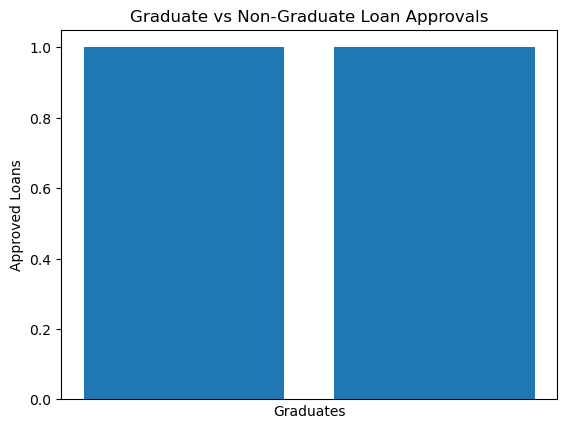

In [23]:
#Create a bar plot to visualize the counts
x=dummies_df['education_Graduate']
y=dummies_df['loan_status_Approved']

plt.bar(x,y)
plt.xticks(rotation=0)
plt.xticks(range(5000,2,2))
plt.xlabel("Graduates")
plt.ylabel("Approved Loans")
plt.title("Graduate vs Non-Graduate Loan Approvals")
plt.show()

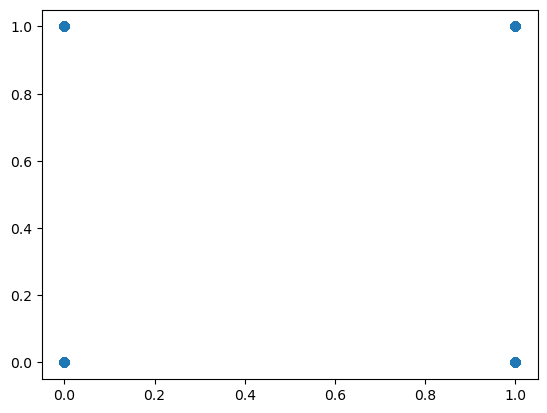

In [24]:
#Visualize the data as a scatterplot

x=dummies_df['education_Graduate']
y=dummies_df['loan_status_Approved']

plt.scatter(x,y)
plt.show()


In [13]:
#Splitting into Train and Test sets
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

X_train, X_test, y_train, y_test = train_test_split